In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import csv
import wfdb
import scipy as sp
#from biosppy.signals import ecg
from wfdb import processing
from scipy import signal
import heartpy as hp

In [106]:
help(wfdb.Record)

Help on class Record in module wfdb.io.record:

class Record(BaseRecord, wfdb.io._header.HeaderMixin, wfdb.io._signal.SignalMixin)
 |  Record(p_signal=None, d_signal=None, e_p_signal=None, e_d_signal=None, record_name=None, n_sig=None, fs=None, counter_freq=None, base_counter=None, sig_len=None, base_time=None, base_date=None, file_name=None, fmt=None, samps_per_frame=None, skew=None, byte_offset=None, adc_gain=None, baseline=None, units=None, adc_res=None, adc_zero=None, init_value=None, checksum=None, block_size=None, sig_name=None, comments=None)
 |  
 |  The class representing single segment WFDB records.
 |  
 |  Record objects can be created using the initializer, by reading a WFDB
 |  header with `rdheader`, or a WFDB record (header and associated dat files)
 |  with `rdrecord`.
 |  
 |  The attributes of the Record object give information about the record as
 |  specified by: https://www.physionet.org/physiotools/wag/header-5.htm
 |  
 |  In addition, the d_signal and p_signal 

In [85]:
help(wfdb.Annotation)

Help on class Annotation in module wfdb.io.annotation:

class Annotation(builtins.object)
 |  Annotation(record_name, extension, sample, symbol=None, subtype=None, chan=None, num=None, aux_note=None, fs=None, label_store=None, description=None, custom_labels=None, contained_labels=None)
 |  
 |  The class representing WFDB annotations.
 |  
 |  Annotation objects can be created using the initializer, or by reading a
 |  WFDB annotation file with `rdann`.
 |  
 |  The attributes of the Annotation object give information about the
 |  annotation as specified by:
 |  https://www.physionet.org/physiotools/wag/annot-5.htm
 |  
 |  Call `show_ann_labels()` to see the list of standard annotation codes. Any
 |  text used to label annotations that are not one of these codes should go in
 |  the 'aux_note' field rather than the 'sym' field.
 |  
 |  Examples
 |  --------
 |  >>> ann1 = wfdb.Annotation(record_name='rec1', extension='atr',
 |                             sample=[10,20,400], symbol=

In [141]:
io.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [2]:
ann_labels = ((''),('N'),('L'),('R'),('a'),('V'),('F'),('J'),('A'),('S'),('E'),('j'),('/'),('Q'),('~'),(''),('|'),
            (''),('s'),('T'),('*'),('D'),('"'),('='),('p'),('B'),('^'),('t'),('+'),('u'),('?'),('!'),
            ('['),(']'),('e'),('n'),('@'),('x'),('f'),('('),(')'),('r'))

In [7]:
signals, fields = wfdb.rdsamp('mit-bih-arrhythmia-database-1.0.0/102')

In [6]:
print(signals)
print(fields)

[[ 0.175  0.635]
 [ 0.175  0.635]
 [ 0.175  0.635]
 ...
 [-0.92   0.36 ]
 [-0.91   0.365]
 [-1.28   0.   ]]
{'fs': 360, 'sig_len': 650000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['MLII', 'V1'], 'comments': ['64 M 1508 694 x1', 'Quinidine', 'There is first degree AV block.  The PVCs are multiform.']}


In [7]:
print (fields['sig_name'])

['MLII', 'V1']


In [8]:
first = []
second = []
for i in range(4000,5000):
    first.append(signals[i][0])
    second.append(signals[i][1])

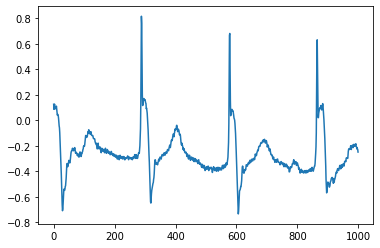

In [9]:
plt.plot (first)

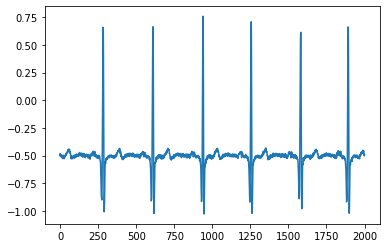

In [23]:
bw = hp.filtering.remove_baseline_wander(first,360)
plt.plot(bw)

In [26]:
loc = processing.find_local_peaks(first,50)

In [27]:
print (loc)

[ 54 131 209 286 365 444 523 600 677 756 835 917 998]


77
200


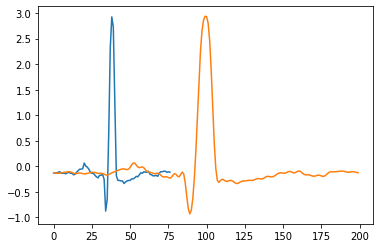

In [33]:
sig_new = first[93:170]
print(len(sig_new))
plt.plot(sig_new)
sig_res = signal.resample(sig_new,200)
print(len(sig_res))
plt.plot(sig_res)

In [80]:
loc2 = processing.find_local_peaks(second,250)

In [81]:
print(loc2)

[ 75 368 661 945]


In [15]:
signals, fields = wfdb.rdsamp('mit-bih-normal-sinus-rhythm-database-1.0.0/16265')
ann16265 = wfdb.rdann('mit-bih-normal-sinus-rhythm-database-1.0.0/16265', 'atr')
print(len(ann16265.sample))
print(signals.shape)

100955
(11730944, 2)


In [151]:
Ch1 = []
Ch2 = []
for i in range(0,100000):
    Ch1.append(signals[i][0])
    Ch2.append(signals[i][1])

In [152]:
loc = processing.find_local_peaks(Ch1,290)
print (loc)

[   82   396   711  1032  1368  1712  2036  2349  2661  2972  3301  3630
  3960  4283  4609  4928  5240  5568  5898  6222  6527  6830  7142  7462
  7785  8105  8414  8721  9025  9320  9628  9953 10281 10589 10891 11470
 12049 14029 14333 14640 15760 16051 16350 16655 16956 17250 18098 18395
 18687 19267 19558 19860 20173 20493 20821 21165 21498 21808 22130 22451
 22781 23126 23457 23774 24089 24403 24720 25040 25373 25704 26008 26309
 26637 26967 27303 27621 27933 28243 28558 28861 29154 29467 29781 30088
 30386 30687 30984 31309 31634 31947 32262 32565 32866 33164 33467 33775
 34091 34390 34979 35288 35598 35911 36216 36529 36836 37140 37449 37772
 38099 38429 38748 39058 39375 39691 40013 40338 40667 40975 41542 42125
 42420 43267 44676 44977 45839 46137 46440 46750 47060 47359 47655 48819
 49124 49421 50527 51114 51965 53087 53380 54220 54516 54813 55107 55405
 55709 56010 56306 56606 56917 57252 57591 57927 58244 58541 58845 59165
 59489 59821 60156 60476 60783 61088 61394 61726 62

In [153]:
loc2 = processing.find_local_peaks(Ch2,290)
print (loc2)

[    9  1040  2043  3951  4556  5456  6351  7506  8728 10366 10751 11128
 12262 13192 13872 14207 14863 16002 17461 18048 18578 19615 20017 21506
 22171 22789 23523 24890 25521 26246 26859 27837 28504 29699 30041 32098
 33474 34098 35436 37075 37398 38093 38892 39859 41107 41775 43430 44558
 45564 46592 46917 47806 48687 49576 50277 50914 51635 52846 54084 55115
 56017 56784 57875 58674 59160 60168 60738 61095 62125 63127 64783 65835
 66261 66824 67724 68332 68758 69752 70263 71031 71704 72016 72675 73009
 74237 74564 74902 76089 76972 77506 78143 79169 79512 80100 80405 81102
 82043 82450 83369 83711 84125 84887 85361 86076 86616 86928 87240 88008
 88381 89005 89988 90414 91063 92090 92797 95095 95533 96234 96800 98131
 98654 99849]


In [127]:
c = 0
c1 = 0
for x in ann101.symbol:
    if x == '|':
        print ("Index")
        print (c)
        print (ann101.sample[c])
        c1 += 1
    c += 1
print (c1)

Index
134
40884
Index
211
63096
Index
213
63414
3


In [177]:
signals106, fields = wfdb.rdsamp('106')
ann106 = wfdb.rdann('106', 'atr')

In [178]:
print("Length:")
print(len(signals106))

Length:
650000


In [179]:
Ch1 = []
Ch2 = []
for i in range(0,len(signals106)):
    Ch1.append(signals106[i][0])
    Ch2.append(signals106[i][1])

In [162]:
loc = processing.find_local_peaks(Ch1,290)
print (loc)

[ 57 351 725]


In [163]:
loc2 = processing.find_local_peaks(Ch2,290)
print (loc2)

[ 19 352 726]


In [167]:
print(ann106.sample[0:4])

[ 83 229 351 724]


In [228]:
ind_last = 0
maxlength = 0
with open('test.csv','w') as t1:
    writer = csv.writer(t1, delimiter=',',lineterminator='\n')
    for i in range(0,len(ann106.sample)):
        ind_curr = ann106.sample[i]
        write_array = Ch1[ind_last:ind_curr]
        while len(write_array) < 451:
            write_array.append(0.0)
        write_array.append(float(ann_labels.index(ann106.symbol[i])))
        writer.writerow(write_array)
        maxlength = len(write_array)
        ind_last = ind_curr
        print(write_array)

[-0.31, -0.31, -0.31, -0.31, -0.31, -0.31, -0.31, -0.31, -0.29, -0.285, -0.295, -0.315, -0.305, -0.3, -0.28, -0.275, -0.275, -0.27, -0.26, -0.24, -0.225, -0.215, -0.205, -0.22, -0.205, -0.17, -0.15, -0.155, -0.14, -0.13, -0.115, -0.075, -0.05, -0.06, -0.05, -0.04, -0.015, 0.005, 0.03, 0.045, 0.07, 0.08, 0.105, 0.13, 0.185, 0.225, 0.255, 0.27, 0.305, 0.345, 0.4, 0.43, 0.46, 0.46, 0.475, 0.52, 0.555, 0.585, 0.575, 0.575, 0.565, 0.57, 0.56, 0.55, 0.53, 0.485, 0.48, 0.465, 0.46, 0.42, 0.385, 0.355, 0.305, 0.285, 0.255, 0.21, 0.165, 0.12, 0.105, 0.085, 0.075, 0.04, 0.005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

[2.33, 2.33, 2.285, 2.085, 1.635, 0.995, 0.355, -0.285, -0.64, -0.445, -0.35, -0.365, -0.415, -0.395, -0.345, -0.33, -0.325, -0.34, -0.36, -0.355, -0.345, -0.35, -0.365, -0.4, -0.375, -0.38, -0.365, -0.355, -0.37, -0.385, -0.37, -0.355, -0.345, -0.355, -0.365, -0.365, -0.37, -0.35, -0.33, -0.34, -0.35, -0.355, -0.355, -0.34, -0.31, -0.3, -0.305, -0.32, -0.325, -0.305, -0.29, -0.285, -0.285, -0.295, -0.29, -0.27, -0.25, -0.255, -0.265, -0.265, -0.255, -0.23, -0.21, -0.215, -0.2, -0.2, -0.195, -0.16, -0.155, -0.155, -0.17, -0.165, -0.135, -0.125, -0.085, -0.065, -0.065, -0.055, -0.04, -0.02, 0.02, 0.055, 0.065, 0.065, 0.1, 0.155, 0.185, 0.215, 0.23, 0.26, 0.3, 0.34, 0.395, 0.415, 0.44, 0.46, 0.505, 0.54, 0.585, 0.61, 0.6, 0.615, 0.63, 0.65, 0.66, 0.655, 0.64, 0.615, 0.605, 0.595, 0.58, 0.545, 0.5, 0.475, 0.44, 0.42, 0.4, 0.36, 0.315, 0.27, 0.235, 0.225, 0.21, 0.17, 0.13, 0.095, 0.065, 0.055, 0.035, 0.01, -0.015, -0.055, -0.08, -0.075, -0.07, -0.11, -0.13, -0.145, -0.16, -0.155, -0.15, -0

[1.98, 2.015, 1.96, 1.745, 1.36, 0.79, 0.15, -0.455, -0.7, -0.61, -0.44, -0.365, -0.375, -0.38, -0.38, -0.375, -0.39, -0.405, -0.425, -0.415, -0.39, -0.405, -0.425, -0.44, -0.43, -0.425, -0.41, -0.395, -0.415, -0.44, -0.425, -0.425, -0.39, -0.395, -0.405, -0.415, -0.42, -0.42, -0.385, -0.385, -0.4, -0.42, -0.4, -0.395, -0.395, -0.39, -0.365, -0.375, -0.375, -0.365, -0.33, -0.335, -0.355, -0.365, -0.355, -0.34, -0.315, -0.32, -0.32, -0.35, -0.355, -0.335, -0.315, -0.29, -0.275, -0.265, -0.25, -0.235, -0.23, -0.245, -0.27, -0.245, -0.235, -0.22, -0.2, -0.185, -0.175, -0.18, -0.16, -0.125, -0.095, -0.07, -0.055, -0.06, -0.055, -0.04, -0.015, 0.0, 0.025, 0.06, 0.115, 0.145, 0.16, 0.17, 0.165, 0.145, 0.165, 0.2, 0.245, 0.235, 0.23, 0.225, 0.255, 0.29, 0.33, 0.33, 0.33, 0.295, 0.3, 0.31, 0.31, 0.285, 0.24, 0.205, 0.225, 0.215, 0.195, 0.145, 0.11, 0.08, 0.07, 0.07, 0.04, 0.015, -0.025, -0.045, -0.05, -0.05, -0.07, -0.08, -0.085, -0.115, -0.13, -0.16, -0.17, -0.19, -0.21, -0.235, -0.25, -0.25,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [1]:
name = (100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,
       121,122,123,124,200,201,202,203,205,207,208,209,210,212,213,214,215,217,219,
       220,221,222,223,228,230,231,232,233,234)
nameNS = (16265,16272,16273,16420,16483,16539,16773,16786,16795,17052,17453,18177,18184,19088,19090,19093,19140,19830)
name1 = []
namesub3 = (122,123,124,200,201,202,203,205,207,208)
name3 = []
for a in range(0,len(namesub3)):
    name3.append("mit-bih-arrhythmia-database-1.0.0/" + str(namesub3[a]))
#rec = []
#for a in range(0,len(name)):
#    rec.append("mit-bih-arrhythmia-database-1.0.0/" + str(name[a]))
#for a in range(0,len(name2)):
#    rec.append("mit-bih-normal-sinus-rhythm-database-1.0.0/" + str(name2[a]))
#for a in range(0,len(name)+len(name2)):
#    if a>35:
#        rec.append("mit-bih-arrhythmia-database-1.0.0/" + str(name[(a-18)]))
#    else:
#        if(a%2 == 0):
#            rec.append("mit-bih-arrhythmia-database-1.0.0/" + str(name[int((a/2))]))
#        else:
#            rec.append("mit-bih-normal-sinus-rhythm-database-1.0.0/" + str(name2[int(((a-1)/2))]))

In [13]:
print (rec)

['mit-bih-arrhythmia-database-1.0.0/100', 'mit-bih-normal-sinus-rhythm-database-1.0.0/16265', 'mit-bih-arrhythmia-database-1.0.0/101', 'mit-bih-normal-sinus-rhythm-database-1.0.0/16272', 'mit-bih-arrhythmia-database-1.0.0/102', 'mit-bih-normal-sinus-rhythm-database-1.0.0/16273', 'mit-bih-arrhythmia-database-1.0.0/103', 'mit-bih-normal-sinus-rhythm-database-1.0.0/16420', 'mit-bih-arrhythmia-database-1.0.0/104', 'mit-bih-normal-sinus-rhythm-database-1.0.0/16483', 'mit-bih-arrhythmia-database-1.0.0/105', 'mit-bih-normal-sinus-rhythm-database-1.0.0/16539', 'mit-bih-arrhythmia-database-1.0.0/106', 'mit-bih-normal-sinus-rhythm-database-1.0.0/16773', 'mit-bih-arrhythmia-database-1.0.0/107', 'mit-bih-normal-sinus-rhythm-database-1.0.0/16786', 'mit-bih-arrhythmia-database-1.0.0/108', 'mit-bih-normal-sinus-rhythm-database-1.0.0/16795', 'mit-bih-arrhythmia-database-1.0.0/109', 'mit-bih-normal-sinus-rhythm-database-1.0.0/17052', 'mit-bih-arrhythmia-database-1.0.0/111', 'mit-bih-normal-sinus-rhythm

In [3]:
#fcount = 0
with open('MIT-BIH_sub3.csv','w') as t1:
    writer = csv.writer(t1, delimiter=',',lineterminator='\n')
    for file in name3:
        sig, fields = wfdb.rdsamp(str(file))
        #sig, fields = wfdb.rdsamp(str(name1[a]))
        ann = wfdb.rdann(str(file), 'atr')
        ind_last = 0
        Ch1 = []
        Ch2 = []
        for i in range(0,len(sig)):
            Ch1.append(sig[i][0])
            #Ch2.append(sig[i][1])
        ind_prev = 0
        ind_beg = 0
        ind_end = 0
        bw = hp.filtering.remove_baseline_wander(Ch1,360)

        for i in range(1,len(ann.sample)-1):
            ind_next = ann.sample[i+1]
            ind_curr = ann.sample[i]
            array = []
            
            #if(ind_curr - ind_prev <= 200):
            ind_beg = int((ind_prev+ind_curr)/2)
            #else:
            #    ind_beg = ind_curr - 99
            #if(ind_next - ind_curr <= 200):
            ind_end = int((ind_next+ind_curr)/2)
            #else:
            #    ind_end = ind_curr + 100
            
            
            front = signal.resample(bw[ind_beg:ind_curr],100)
            back = signal.resample(bw[ind_curr:ind_next],100)
            #array = bw[ind_beg:ind_end] #Ch1[ind_beg:ind_end]
            write_array = np.concatenate((front,back),axis=None)
            #write_array = front + back

            #if(ind_curr-ind_prev < 100):
            #    array = np.ndarray.tolist(np.zeros(ind_curr-ind_prev)) + Ch1[ind_prev:ind_curr]
            #else:
            #    array = Ch1[ind_prev:ind_curr]
            
            #if(ind_next-ind_curr < 100):
            #    parray = array + Ch1[ind_curr:ind_next] + np.ndarray.tolist(np.zeros(ind_next-ind_curr))
            #else:
            #    parray = array + Ch1[ind_curr:ind_next]          
            
            
            #while len(array) < 300:
            #    array.append(0.0)
            #write_array = signal.resample(array,200)
            #write_array = back.tolist()
            write_array = write_array.tolist()
            #for specific beats
            #write_array.append(float(ann_labels.index(ann.symbol[i])))
            
            #for normal or abnormal
            if(ann.symbol[i] == 'N'):
                write_array.append(1.0)
            else:
                write_array.append(2.0)
            
            writer.writerow(write_array)
            ind_last = ind_curr
            ind_prev = ind_curr
        #fcount += 1
        #if (fcount > 10):
        #    break

In [10]:
print(arrcount)

112647


In [26]:
type (write_array)

list

In [23]:
type (array)

list

In [27]:
print (write_array[-1])

1.0
